## Q1

In [1]:
# libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# a)
df = pd.read_csv('Synth_Energy_Data.csv')
df.tail()

,Avg_Daily_Temperature_Celsius,Daily_Sunlight_Hours,Number_of_Occupants,Building_Type,Total_Floor_Area_sqm,Energy_Consumption_kWh
233,19.700708,33.945759,7.133525,Commercial,333.400065,291.565587
234,7.809720,1.510597,7.842051,Commercial,147.345810,67.905572
235,28.898085,31.190009,6.360749,Industrial,283.217165,335.351432
236,11.230894,18.469539,5.244186,Industrial,318.773333,160.390858
237,0.972639,34.753768,4.706568,Residential,286.264175,214.962964


In [3]:
# b)
rows, features = df.shape
print('Features: ', features)
print('Rows: ', rows)

Features:  6
Rows:  238


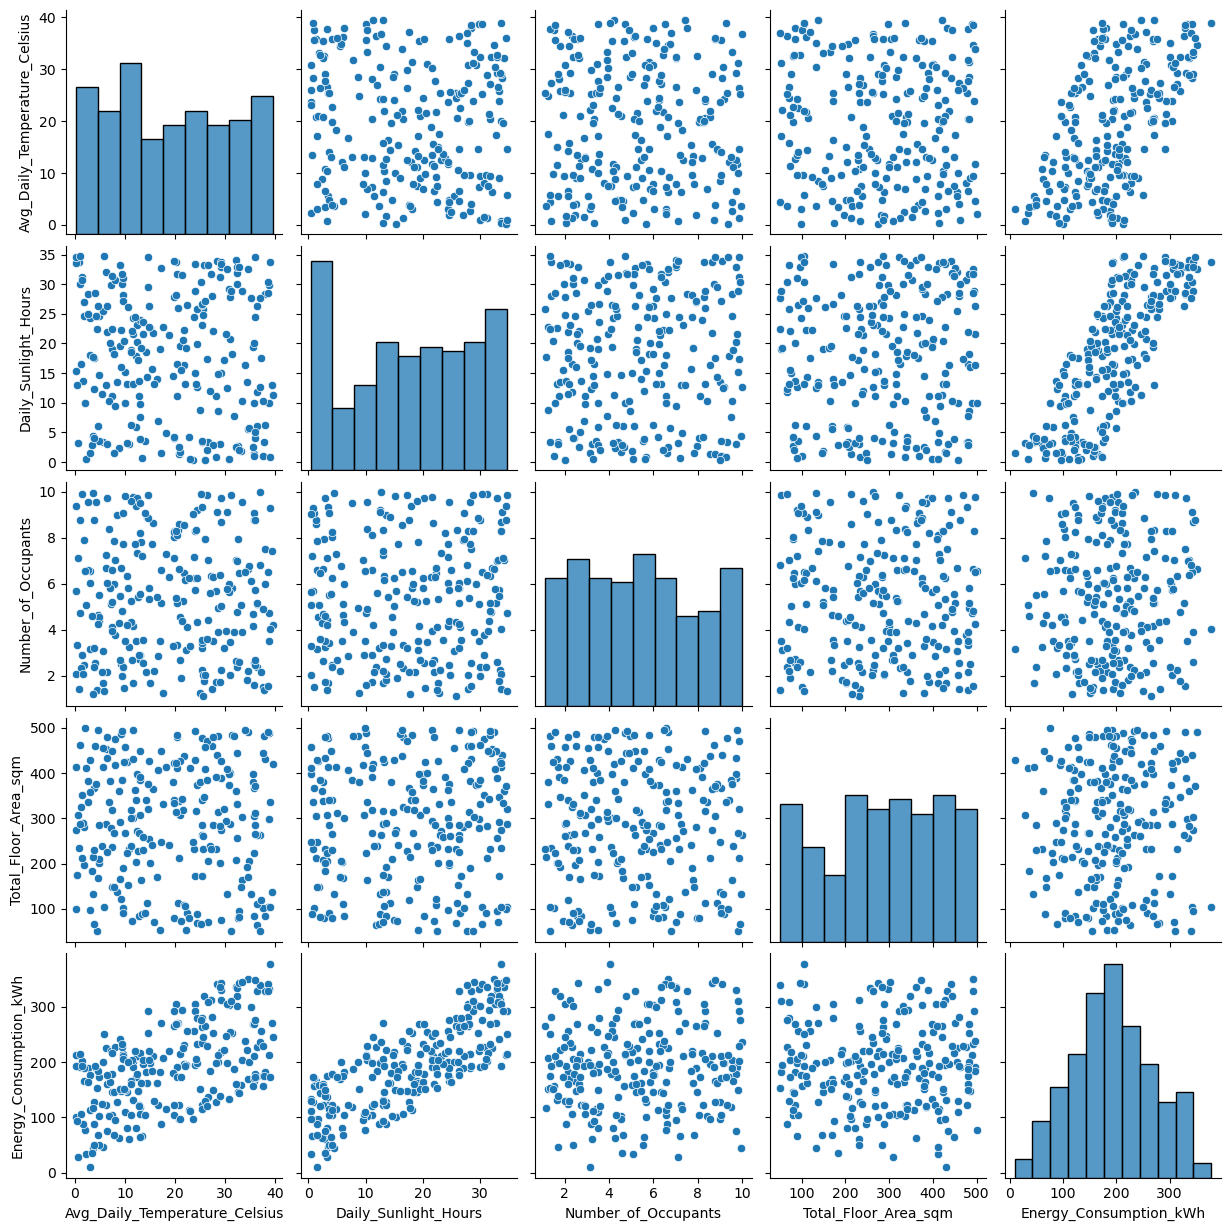

In [4]:
# c)
sns.pairplot(df)

#### This is a MLR problem so we can see here some linear correlations respect to Energy_Consumption like Avg_Daily_Temperature_celsius and Daily_Sunlight_Hours

In [5]:
# d)
df.drop('Building_Type', axis=1, inplace=True)

In [6]:
# e)
dep_var = df['Energy_Consumption_kWh']
slr_indp_var = df[['Avg_Daily_Temperature_Celsius']]
mlr_indp_var = df[['Avg_Daily_Temperature_Celsius', 'Daily_Sunlight_Hours']]

slr_train_x, slr_test_x, slr_train_y, slr_test_y = train_test_split(slr_indp_var, dep_var, test_size=0.27, random_state=10)
mlr_train_x, mlr_test_x, mlr_train_y, mlr_test_y = train_test_split(mlr_indp_var, dep_var, test_size=0.27, random_state=10)

In [7]:
# f) fit the model and lets use MAE for the company requirements
mlr_model = LinearRegression()
mlr_model.fit(mlr_train_x, mlr_train_y)
mlr_pred = mlr_model.predict(mlr_test_x)

slr_model = LinearRegression()
slr_model.fit(slr_train_x, slr_train_y)
slr_pred = slr_model.predict(slr_test_x)

mlr_mae = mean_absolute_error(mlr_pred, mlr_test_y)
slr_mae = mean_absolute_error(slr_pred, slr_test_y)

In [8]:
# g) 
print('SLR MAE: ', slr_mae)
print('MLR MAE: ', mlr_mae)

if(slr_mae < mlr_mae):
    print('Based on MAE, SLR performs better')
else:
    print('Based on MAE, MLR performs better')

SLR MAE:  55.55235580572371
MLR MAE:  9.232449723358396
Based on MAE, MLR performs better
